DANE INWESTYCYJNE - STATYSTYKI

Zmienne wejściowe (X):
  Wysokość inwestycji: 463.20 - 99971.77 PLN
  Ryzyko inwestycyjne: 0.03 - 9.99
  Czas trwania: 0.00 - 19.96 lat

Zmienne wyjściowe (y):
  Zwrot z inwestycji: -1332.33 - 34244.98 PLN
  Stopa procentowa: 1.97 - 25.74 %

TRENOWANIE SIECI NEURONOWEJ

WYNIKI MODELU

Konfiguracja sieci: (100, 50, 25)
Funkcja aktywacji: relu
Liczba iteracji: 72

--- ZWROT Z INWESTYCJI ---
MSE (treningowy): 963156.79
MSE (testowy): 1238344.17
MAE (testowy): 923.15 PLN
R² (treningowy): 0.980772
R² (testowy): 0.976683

--- STOPA PROCENTOWA ---
MSE (treningowy): 0.097924
MSE (testowy): 0.115102
MAE (testowy): 0.2698 %
R² (treningowy): 0.996472
R² (testowy): 0.995816

--- SPEŁNIENIE WARUNKÓW ---
✓ Zwrot z inwestycji: R² = 0.9767 (doskonały wynik!)
✓ Stopa procentowa: R² = 0.9958 (doskonały wynik!)


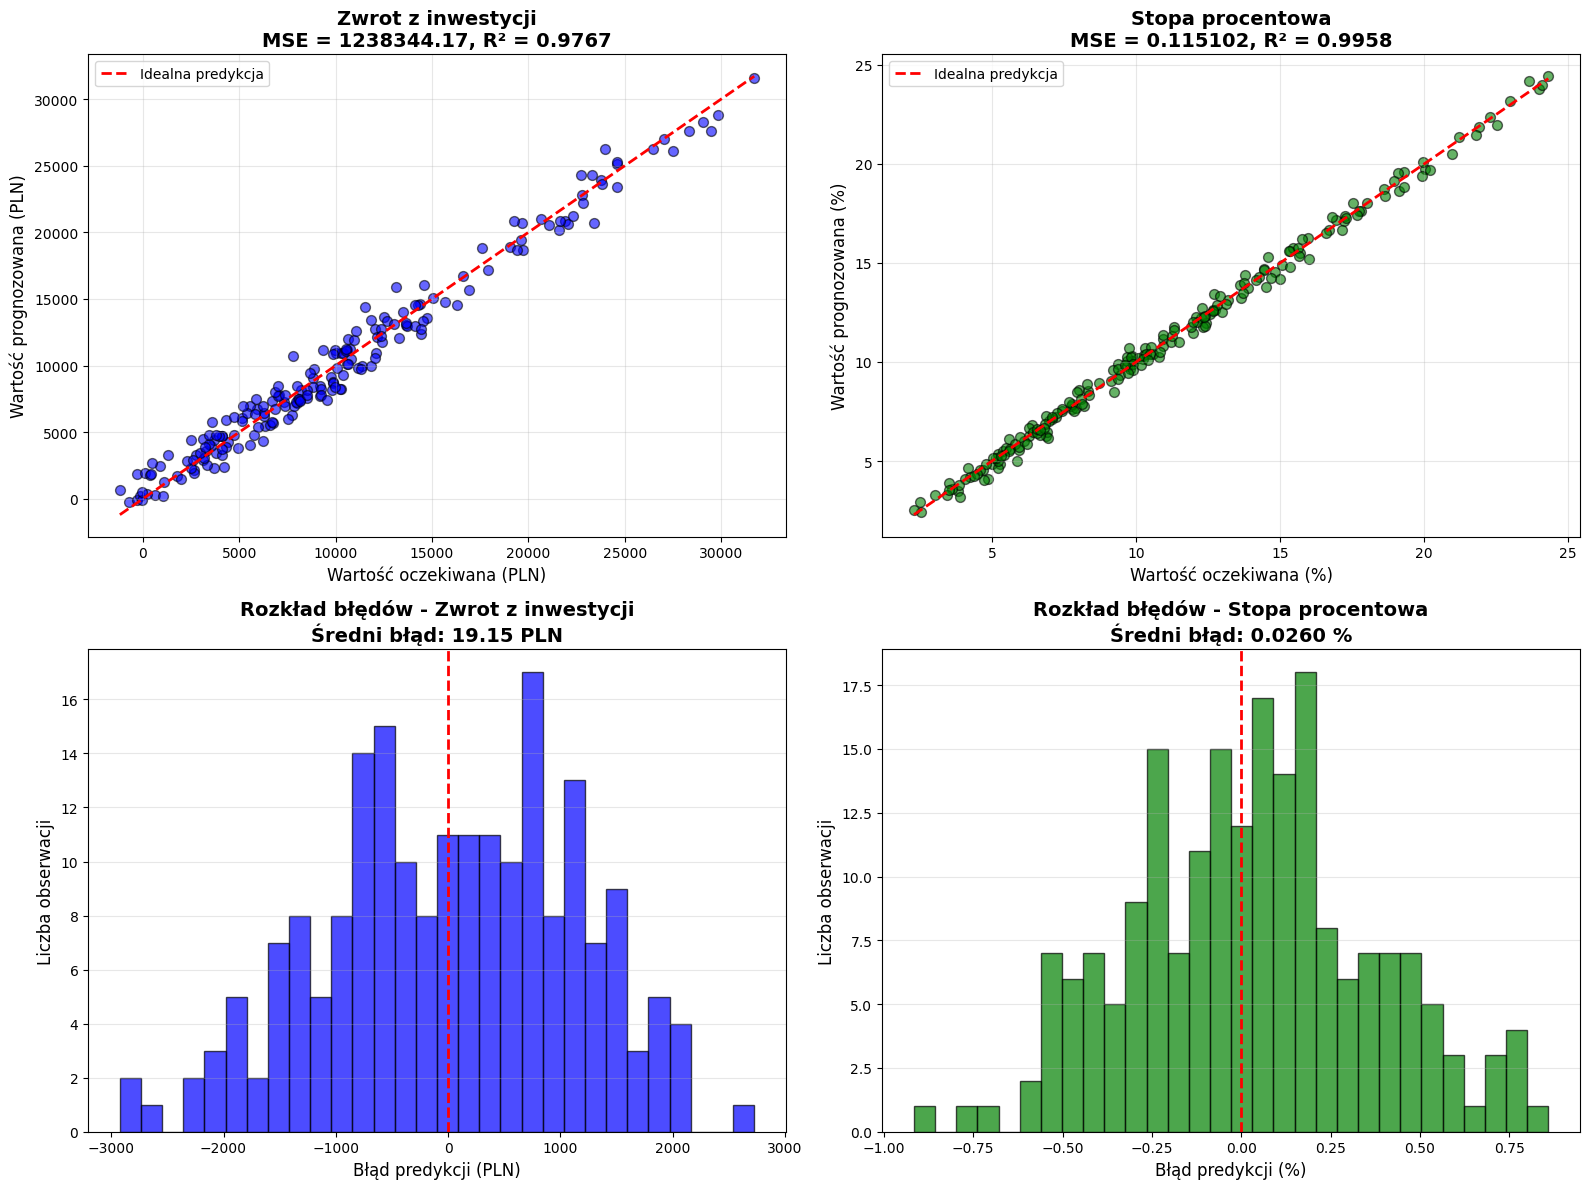

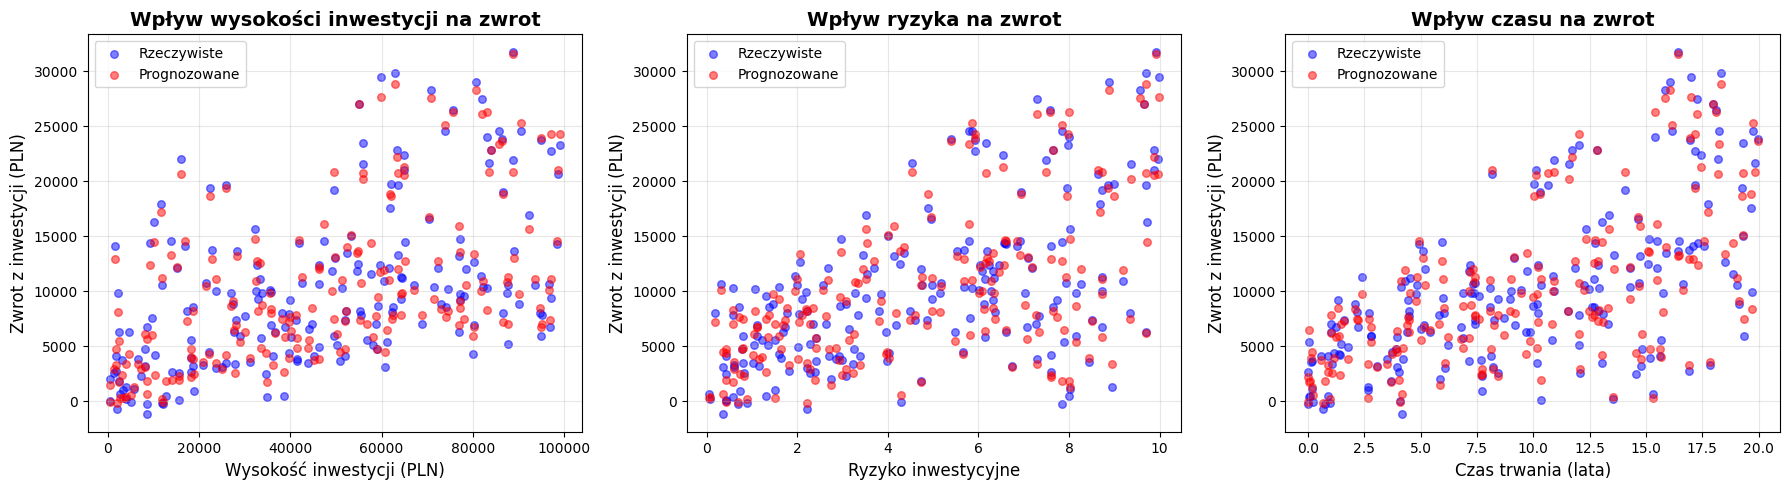


TESTOWANIE RÓŻNYCH KONFIGURACJI SIECI

1. Warstwy: (50,)                         
   ✓ Zwrot:  MSE = 1335335.83, R² = 0.9749
   ✓ Stopa:  MSE =   0.171180, R² = 0.9938

2. Warstwy: (100,)                        
   ✓ Zwrot:  MSE = 1389657.49, R² = 0.9738
   ✓ Stopa:  MSE =   0.172703, R² = 0.9937

3. Warstwy: (100, 50)                     
   ✓ Zwrot:  MSE = 1235957.70, R² = 0.9767
   ✓ Stopa:  MSE =   0.106026, R² = 0.9961

4. Warstwy: (150, 100)                    
   ✓ Zwrot:  MSE = 1159966.80, R² = 0.9782
   ✓ Stopa:  MSE =   0.119373, R² = 0.9957

5. Warstwy: (100, 50, 25)                 
   ✓ Zwrot:  MSE = 1258488.18, R² = 0.9763
   ✓ Stopa:  MSE =   0.115545, R² = 0.9958

6. Warstwy: (150, 100, 50)                
   ✓ Zwrot:  MSE = 1190391.08, R² = 0.9776
   ✓ Stopa:  MSE =   0.112486, R² = 0.9959

7. Warstwy: (200, 100, 50)                
   ✓ Zwrot:  MSE = 1130587.42, R² = 0.9787
   ✓ Stopa:  MSE =   0.110597, R² = 0.9960

PODSUMOWANIE

Najlepsza konfiguracja (najniższy łą

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Generacja danych dla inwestycji finansowych z realistycznymi zależnościami
np.random.seed(42)

# X: wysokość inwestycji, ryzyko inwestyjne, czas trwania inwestycji
n_samples = 1000
wysokosc = np.random.rand(n_samples) * 100000  # 0-100,000 PLN
ryzyko = np.random.rand(n_samples) * 10  # 0-10
czas = np.random.rand(n_samples) * 20  # 0-20 lat

X = np.column_stack([wysokosc, ryzyko, czas])

# y: zwrot z inwestycji, stopa procentowa
# Tworzymy REALISTYCZNE zależności

# Zwrot z inwestycji = f(wysokość, ryzyko, czas) + szum
zwrot = (
    wysokosc * 0.05 +  # 5% bazowy zwrot od wysokości
    wysokosc * ryzyko * 0.008 +  # wyższe ryzyko = wyższy zwrot (0.8% za punkt ryzyka)
    wysokosc * czas * 0.003 +  # dłuższy czas = wyższy zwrot (0.3% rocznie)
    ryzyko * czas * 100 +  # interakcja ryzyko-czas
    np.random.randn(n_samples) * 1000  # niewielki szum
)

# Stopa procentowa = f(ryzyko, czas) + szum
stopa = (
    2.0 +  # bazowa stopa 2%
    ryzyko * 1.0 +  # wyższe ryzyko = wyższa stopa (1% za punkt ryzyka)
    czas * 0.2 +  # dłuższy czas = wyższa stopa (0.2% rocznie)
    ryzyko * czas * 0.05 +  # interakcja
    np.random.randn(n_samples) * 0.3  # niewielki szum
)

y = np.column_stack([zwrot, stopa])

print("="*80)
print("DANE INWESTYCYJNE - STATYSTYKI")
print("="*80)
print("\nZmienne wejściowe (X):")
print(f"  Wysokość inwestycji: {X[:, 0].min():.2f} - {X[:, 0].max():.2f} PLN")
print(f"  Ryzyko inwestycyjne: {X[:, 1].min():.2f} - {X[:, 1].max():.2f}")
print(f"  Czas trwania: {X[:, 2].min():.2f} - {X[:, 2].max():.2f} lat")
print("\nZmienne wyjściowe (y):")
print(f"  Zwrot z inwestycji: {y[:, 0].min():.2f} - {y[:, 0].max():.2f} PLN")
print(f"  Stopa procentowa: {y[:, 1].min():.2f} - {y[:, 1].max():.2f} %")

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standaryzacja danych
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)

# Tworzenie i trenowanie modelu sieci neuronowej
print("\n" + "="*80)
print("TRENOWANIE SIECI NEURONOWEJ")
print("="*80)

model = MLPRegressor(
    hidden_layer_sizes=(100, 50, 25),
    activation='relu',
    solver='adam',
    max_iter=3000,
    random_state=42,
    learning_rate_init=0.001,
    learning_rate='adaptive',
    early_stopping=True,
    validation_fraction=0.1,
    alpha=0.0001,
    tol=1e-6,
    verbose=False  # Zmieniono na False dla czystszego outputu
)

# Trenowanie modelu
model.fit(X_train_scaled, y_train_scaled)

# Predykcja (odwracamy standaryzację)
y_pred_train_scaled = model.predict(X_train_scaled)
y_pred_test_scaled = model.predict(X_test_scaled)

y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled)
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled)

# Obliczanie metryk dla obu zmiennych wyjściowych
print("\n" + "="*80)
print("WYNIKI MODELU")
print("="*80)

# Zwrot z inwestycji
mse_train_zwrot = mean_squared_error(y_train[:, 0], y_pred_train[:, 0])
mse_test_zwrot = mean_squared_error(y_test[:, 0], y_pred_test[:, 0])
mae_test_zwrot = mean_absolute_error(y_test[:, 0], y_pred_test[:, 0])
r2_train_zwrot = r2_score(y_train[:, 0], y_pred_train[:, 0])
r2_test_zwrot = r2_score(y_test[:, 0], y_pred_test[:, 0])

print(f"\nKonfiguracja sieci: {model.hidden_layer_sizes}")
print(f"Funkcja aktywacji: {model.activation}")
print(f"Liczba iteracji: {model.n_iter_}")

print("\n--- ZWROT Z INWESTYCJI ---")
print(f"MSE (treningowy): {mse_train_zwrot:.2f}")
print(f"MSE (testowy): {mse_test_zwrot:.2f}")
print(f"MAE (testowy): {mae_test_zwrot:.2f} PLN")
print(f"R² (treningowy): {r2_train_zwrot:.6f}")
print(f"R² (testowy): {r2_test_zwrot:.6f}")

# Stopa procentowa
mse_train_stopa = mean_squared_error(y_train[:, 1], y_pred_train[:, 1])
mse_test_stopa = mean_squared_error(y_test[:, 1], y_pred_test[:, 1])
mae_test_stopa = mean_absolute_error(y_test[:, 1], y_pred_test[:, 1])
r2_train_stopa = r2_score(y_train[:, 1], y_pred_train[:, 1])
r2_test_stopa = r2_score(y_test[:, 1], y_pred_test[:, 1])

print("\n--- STOPA PROCENTOWA ---")
print(f"MSE (treningowy): {mse_train_stopa:.6f}")
print(f"MSE (testowy): {mse_test_stopa:.6f}")
print(f"MAE (testowy): {mae_test_stopa:.4f} %")
print(f"R² (treningowy): {r2_train_stopa:.6f}")
print(f"R² (testowy): {r2_test_stopa:.6f}")

# Sprawdzenie warunków
print("\n--- SPEŁNIENIE WARUNKÓW ---")
if r2_test_zwrot > 0.95:  # R² > 95% to bardzo dobry wynik
    print(f"✓ Zwrot z inwestycji: R² = {r2_test_zwrot:.4f} (doskonały wynik!)")
else:
    print(f"✗ Zwrot z inwestycji: R² = {r2_test_zwrot:.4f} (wymaga poprawy)")

if r2_test_stopa > 0.95:  # R² > 95% to bardzo dobry wynik
    print(f"✓ Stopa procentowa: R² = {r2_test_stopa:.4f} (doskonały wynik!)")
else:
    print(f"✗ Stopa procentowa: R² = {r2_test_stopa:.4f} (wymaga poprawy)")

# Wizualizacja wyników
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Wykres 1: Zwrot z inwestycji - wartość oczekiwana vs prognozowana
axes[0, 0].scatter(y_test[:, 0], y_pred_test[:, 0], alpha=0.6, s=50, edgecolors='k', c='blue')
axes[0, 0].plot([y_test[:, 0].min(), y_test[:, 0].max()], 
                [y_test[:, 0].min(), y_test[:, 0].max()], 
                'r--', lw=2, label='Idealna predykcja')
axes[0, 0].set_xlabel('Wartość oczekiwana (PLN)', fontsize=12)
axes[0, 0].set_ylabel('Wartość prognozowana (PLN)', fontsize=12)
axes[0, 0].set_title(f'Zwrot z inwestycji\nMSE = {mse_test_zwrot:.2f}, R² = {r2_test_zwrot:.4f}', 
                     fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Wykres 2: Stopa procentowa - wartość oczekiwana vs prognozowana
axes[0, 1].scatter(y_test[:, 1], y_pred_test[:, 1], alpha=0.6, s=50, edgecolors='k', c='green')
axes[0, 1].plot([y_test[:, 1].min(), y_test[:, 1].max()], 
                [y_test[:, 1].min(), y_test[:, 1].max()], 
                'r--', lw=2, label='Idealna predykcja')
axes[0, 1].set_xlabel('Wartość oczekiwana (%)', fontsize=12)
axes[0, 1].set_ylabel('Wartość prognozowana (%)', fontsize=12)
axes[0, 1].set_title(f'Stopa procentowa\nMSE = {mse_test_stopa:.6f}, R² = {r2_test_stopa:.4f}', 
                     fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Wykres 3: Błędy predykcji zwrotu z inwestycji
errors_zwrot = y_test[:, 0] - y_pred_test[:, 0]
axes[1, 0].hist(errors_zwrot, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Błąd predykcji (PLN)', fontsize=12)
axes[1, 0].set_ylabel('Liczba obserwacji', fontsize=12)
axes[1, 0].set_title(f'Rozkład błędów - Zwrot z inwestycji\nŚredni błąd: {errors_zwrot.mean():.2f} PLN', 
                     fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Wykres 4: Błędy predykcji stopy procentowej
errors_stopa = y_test[:, 1] - y_pred_test[:, 1]
axes[1, 1].hist(errors_stopa, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Błąd predykcji (%)', fontsize=12)
axes[1, 1].set_ylabel('Liczba obserwacji', fontsize=12)
axes[1, 1].set_title(f'Rozkład błędów - Stopa procentowa\nŚredni błąd: {errors_stopa.mean():.4f} %', 
                     fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Dodatkowe wykresy - wpływ poszczególnych czynników
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Wpływ wysokości inwestycji na zwrot
axes[0].scatter(X_test[:, 0], y_test[:, 0], alpha=0.5, s=30, label='Rzeczywiste', c='blue')
axes[0].scatter(X_test[:, 0], y_pred_test[:, 0], alpha=0.5, s=30, label='Prognozowane', c='red')
axes[0].set_xlabel('Wysokość inwestycji (PLN)', fontsize=12)
axes[0].set_ylabel('Zwrot z inwestycji (PLN)', fontsize=12)
axes[0].set_title('Wpływ wysokości inwestycji na zwrot', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Wpływ ryzyka na zwrot
axes[1].scatter(X_test[:, 1], y_test[:, 0], alpha=0.5, s=30, label='Rzeczywiste', c='blue')
axes[1].scatter(X_test[:, 1], y_pred_test[:, 0], alpha=0.5, s=30, label='Prognozowane', c='red')
axes[1].set_xlabel('Ryzyko inwestycyjne', fontsize=12)
axes[1].set_ylabel('Zwrot z inwestycji (PLN)', fontsize=12)
axes[1].set_title('Wpływ ryzyka na zwrot', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Wpływ czasu na zwrot
axes[2].scatter(X_test[:, 2], y_test[:, 0], alpha=0.5, s=30, label='Rzeczywiste', c='blue')
axes[2].scatter(X_test[:, 2], y_pred_test[:, 0], alpha=0.5, s=30, label='Prognozowane', c='red')
axes[2].set_xlabel('Czas trwania (lata)', fontsize=12)
axes[2].set_ylabel('Zwrot z inwestycji (PLN)', fontsize=12)
axes[2].set_title('Wpływ czasu na zwrot', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Testowanie różnych konfiguracji
print("\n" + "="*80)
print("TESTOWANIE RÓŻNYCH KONFIGURACJI SIECI")
print("="*80)

configurations = [
    (50,),
    (100,),
    (100, 50),
    (150, 100),
    (100, 50, 25),
    (150, 100, 50),
    (200, 100, 50),
]

results = []
for i, config in enumerate(configurations):
    model_test = MLPRegressor(
        hidden_layer_sizes=config,
        activation='relu',
        solver='adam',
        max_iter=3000,
        random_state=42,
        learning_rate_init=0.001,
        learning_rate='adaptive',
        early_stopping=True,
        validation_fraction=0.1,
        verbose=False
    )
    
    model_test.fit(X_train_scaled, y_train_scaled)
    y_pred_scaled = model_test.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    
    mse_zwrot = mean_squared_error(y_test[:, 0], y_pred[:, 0])
    mse_stopa = mean_squared_error(y_test[:, 1], y_pred[:, 1])
    r2_zwrot = r2_score(y_test[:, 0], y_pred[:, 0])
    r2_stopa = r2_score(y_test[:, 1], y_pred[:, 1])
    
    results.append((config, mse_zwrot, mse_stopa, r2_zwrot, r2_stopa))
    
    status_zwrot = "✓" if r2_zwrot > 0.95 else "✗"
    status_stopa = "✓" if r2_stopa > 0.95 else "✗"
    
    print(f"\n{i+1}. Warstwy: {str(config):30}")
    print(f"   {status_zwrot} Zwrot:  MSE = {mse_zwrot:>10.2f}, R² = {r2_zwrot:.4f}")
    print(f"   {status_stopa} Stopa:  MSE = {mse_stopa:>10.6f}, R² = {r2_stopa:.4f}")

# Najlepsza konfiguracja
best_config = min(results, key=lambda x: x[1] + x[2])

print("\n" + "="*80)
print("PODSUMOWANIE")
print("="*80)
print(f"\nNajlepsza konfiguracja (najniższy łączny MSE): {best_config[0]}")
print(f"  Zwrot:  MSE = {best_config[1]:.2f}, R² = {best_config[3]:.4f}")
print(f"  Stopa:  MSE = {best_config[2]:.6f}, R² = {best_config[4]:.4f}")
print("="*80)

# Przykładowa predykcja dla nowej inwestycji
print("\n" + "="*80)
print("PRZYKŁADOWA PREDYKCJA DLA NOWEJ INWESTYCJI")
print("="*80)

nowa_inwestycja = np.array([[50000, 5, 10]])  # 50k PLN, ryzyko 5, 10 lat
nowa_inwestycja_scaled = scaler_X.transform(nowa_inwestycja)
predykcja_scaled = model.predict(nowa_inwestycja_scaled)
predykcja = scaler_y.inverse_transform(predykcja_scaled)

print(f"\nParametry inwestycji:")
print(f"  Wysokość: {nowa_inwestycja[0, 0]:.2f} PLN")
print(f"  Ryzyko: {nowa_inwestycja[0, 1]:.2f}")
print(f"  Czas trwania: {nowa_inwestycja[0, 2]:.2f} lat")
print(f"\nPrognoza:")
print(f"  Zwrot z inwestycji: {predykcja[0, 0]:.2f} PLN")
print(f"  Stopa procentowa: {predykcja[0, 1]:.2f} %")
print("="*80)